# 5. FELADAT

A feladatsort Python nyelven kell megoldani a jupyter notebookban. Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat! Az előre megadott cellákon ne változtassunk!

# Időbeli folyamatok korrelációjának vizsgálata
Elmélet emlékeztető

Időbeli folyamatok vizsgálatakor érdekes kérdés, hogy két változó "mennyire egyszerre" változik, illetve a változások milyen időbeli eltolással követik egymást. Jelöljön $f(t)$ és $g(t)$ két folytonos, de időben diszkréten és véges módon mintavételezett folyamatot. A két folyamat keresztkorrelációs függvényét, mely a $\tau$ _időeltolás_ függvényében adja meg, hogy a két folyamat mennyire egyszerre változik, a következő módon definiálhatjuk:
$$
R_{fg}(\tau) = \sum_t f(t) \, g(t + \tau) = \sum_t f(t - \tau) g(t) \;.
$$
(Bővebben ld. az elméleti anyagban és az érdeklődőbbeknek: https://en.wikipedia.org/wiki/Cross-correlation)

Gyakran érdemes azt vizsgálni, hogy $f(t)$ és $g(t)$ az átlagukhoz képest mennyire térnek ki hasonlóan. 
Az átlagokat levonva az ún. kovariancia-függvényt kapjuk.
Ha pedig a kovariancia függvényt a két jel szórásával is lenormáljuk (ugyanis így egyező jelek esetén 1-et kapnánk), akkor kapjuk a normált korrelációs függvényt:
$$
K_{fg}(\tau) = \frac{1}{\sigma_f \sigma_g} \sum_t \left( f(t) - \mu_f \right) \left( g(t + \tau) - \mu_g \right)\;,
$$
ahol $\mu_f, \mu_g$ a két jel átlaga, $\sigma_f, \sigma_g$ pedig a szórásuk.

Belátható, hogy ha a folyamatokat csak egy időben véges intervallumon ismerjük, akkor a korrelációs függvényt csak egy véges hosszúságú $\tau < \tau_{\mathrm{max}}$ időablakkal érdemes meghatározni. A keresztkorrelációs függvény maximumának megkeresésével megtalálhatjuk azt az időeltolást, amely mellett a két időbeli folyamat a leginkább korrellál.

Amennyiben egy időbeli folyamat korrelációját nem egy másik folyamathoz, hanem saját magához képest vizsgáljuk, úgy  [autokorrelációról](https://en.wikipedia.org/wiki/Autocorrelation) illetve autokovarianciáról beszélünk. Belátható, hogy az autokorrelációs függvény páros, illetve hogy periodikus jelek autokorrelációja periodikus. Nem periodikus jelek esetében az autokorrelációs függvény $\tau = 0$-tól távolodva lecsengő. A lecsengés üteme függ a vizsgált folyamatoktól. Véletlenszerű zajok és kaotikusan viselkedő rendszerek (pontosabban a kaotikus rendszerek erősen keverő fajtája) esetében a lecsengés exponenciálisan gyors. Előfordulnak olyan kaotikus folyamatok is, ahol a korrelációk csak hatványfüggvény szerint csengenek le.

A keresztkorrelációs függvényhez nagyon hasonló módon definiáljuk diszkréten mintavételezett jelek [konvolúcióját](https://en.wikipedia.org/wiki/Convolution):
$$
f(t) \star g(t) = \sum_\tau f(\tau) \, g(t - \tau)
$$

Lineáris rendszerek esetében korábban már láttuk, hogy a konvolúció művelete segítségével igen könnyen meghatározható a rendszer válasza, ha a [Green-függvény](https://en.wikipedia.org/wiki/Green%27s_function) (impulzusválasz) ismert. A konvolúció művelet Fourier-térben szorzásnak felel meg:

$$
(f \star g)(\omega) = f(\omega) g(\omega)
$$

Az autokorrelációs függvény szintén érdekes kapcsolatban áll a Fourier-transzformációval. A [Wiener-Hincsin-tétel](https://en.wikipedia.org/wiki/Wiener–Khinchin_theorem) kimondja, hogy egy függvény autokorrelációs függvényének Fourier-transzformáltja megegyezik a függvény teljesítményspektrumával, azaz Fourier-transzformáltjának abszolút érték négyzetével:

$$
R_{ff}(\omega) = \left| f(\omega) \right|^2
$$

# Feladatok

## Alap 1. feladatrész - Korreláció, konvolúció

a) Írjunk olyan függvényeket, melyek a következő jelalakokat valósítják meg:

* egyetlen $T$ szélességű, $A$ amplitúdójú négyszögimpulzus (boxcar)
* egyetlen $T$ szélességű, $A$ amplitúdójú egyenlő szárú háromszögimpulzus (függőleges szimmetriatengellyel)
* egyetlen $T$ szélességű, $A$ amplitúdójú függőlegesen felfutó, ferdén lefutó háromszögimpulzus
* $T$ periódusidejú, $A$ amplitúdójú négyszögjel

Rajzoljuk fel a jeleket egy megfelelően mintavételezett időtartományon, majd határozzuk meg:

b) mindegyik jel autokorrelációját

c) mindegyik párra a keresztkorrelációját. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

d) mindegyik párra a konvolúciót egyik sorrendben. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

A feladat megvalósításához használjuk a `numpy.correlate` és `numpy.convolve` függvényeket.
A `numpy.correlate` alapértelmezésben a 'valid' üzemmódban működik, amikor csak annyi eltolást enged, aminél az egyik jel időtartama tartalmazza a másikét. Ezért vagy azt kell tennünk, hogy különböző szélességben mintavételezzük a két jelet, vagy a függvényleírásból kikeressük, hogyan lehet átállítani úgy, hogy egyforma szélességűekre is működjön. Az utóbbi esetben a széleffektus elkerülésére/csökkentésére legyen a mintavételezési tartomány elegendően nagy!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# feladat megoldása
# a) rész
# jelalakok

# https://practical-neuroimaging.github.io/on_convolution.html
def boxcar(A,T,t):
    times = np.arange(0, t, t/500)
    n_time_points = len(times)
    neural_signal = np.zeros(n_time_points)
    a=t-T
    neural_signal[(times >= a/2) & (times < t-a/2)] = A
    return(times,neural_signal)

def triangle(A,T,t):
    times = np.arange(0, t, t/500)
    s=t-(T+2)
    baloldal=np.linspace(0,A,int((T/2)+1))
    jobboldal=np.linspace(A,0,int((T/2)+1))
    zero=np.zeros(int(s/2))
    a=np.concatenate((zero,baloldal))
    b=np.concatenate((a,jobboldal))
    jel=np.concatenate((b,zero,))
    return (times,jel)

def sawtooth(A,T,t):
    times = np.arange(0, t, t/100)
    s=t-(T)
    lemenő=np.linspace(A,0,T)
    zero=np.zeros(int(s/2))
    b=np.concatenate((zero,lemenő))
    jel=np.concatenate((b,zero))
    return(times,jel)

def negy(A,T,t):
    hely=A*np.sign(np.sin((2*np.pi*t)/T))
    return(hely)



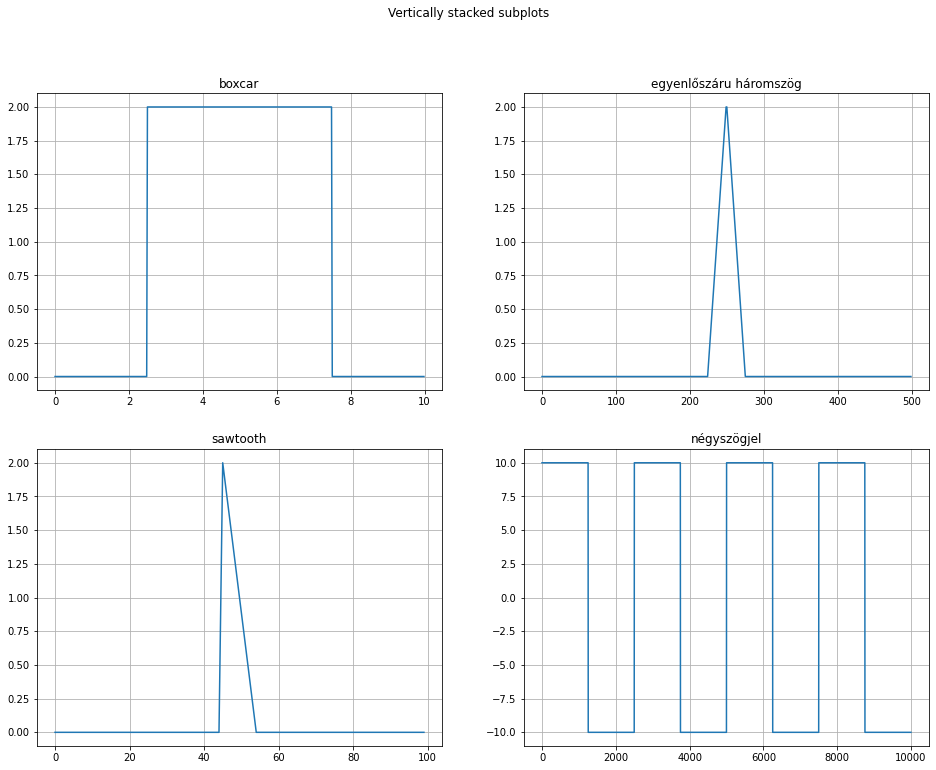

In [3]:
fig, axs = plt.subplots(2,2,figsize=(16,12))
fig.suptitle('Vertically stacked subplots')
 
boxom=boxcar(2,5,10)
times=boxom[0]
neural_signal=boxom[1]

axs[0,0].plot(times, neural_signal)
axs[0,0].set_title("boxcar")
axs[0,0].grid()

tri=triangle(2,50,500)
x=tri[0]
y=tri[1]

axs[0,1].plot(x,y)
axs[0,1].set_title("egyenlőszáru háromszög")
axs[0,1].grid()


saw=sawtooth(2,10,100)
xs=saw[0]
ys=saw[1]

axs[1,0].plot(xs,ys)
axs[1,0].set_title("sawtooth")
axs[1,0].grid()

plotnegy=(negy(10,0.5,np.linspace(-1,1,10000)))


axs[1,1].plot(plotnegy)
axs[1,1].set_title("négyszögjel")
axs[1,1].grid()

In [4]:
# b) rész
# autokorrelációk

def autocross(x,y):   #https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/
    r = np.correlate(x, y, mode='full')
    return r


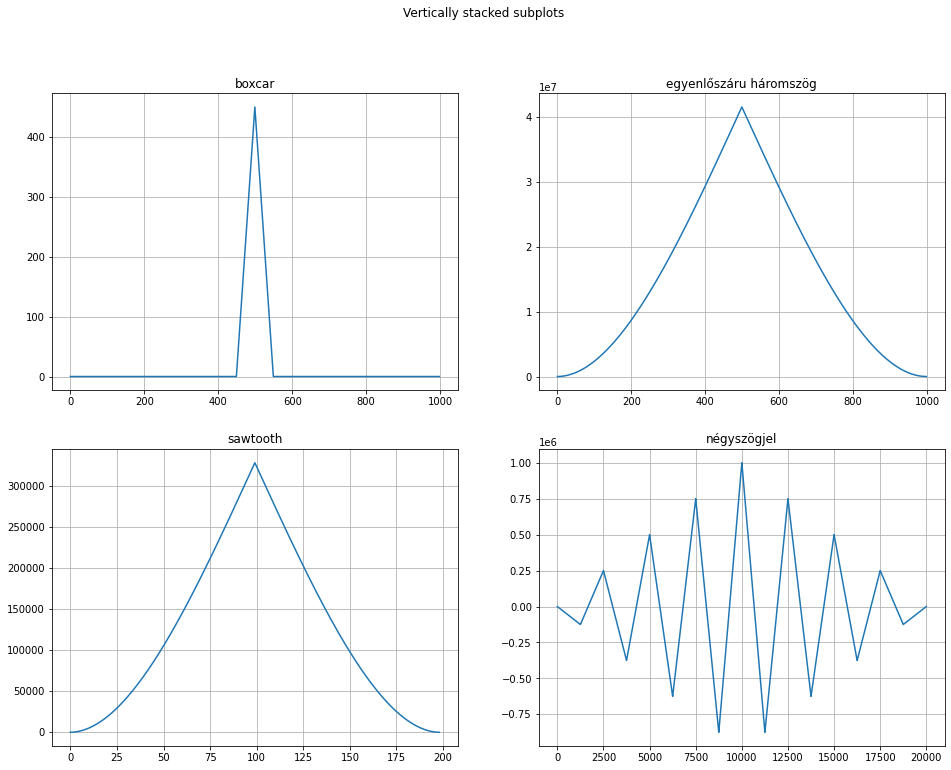

In [5]:
fig, axs = plt.subplots(2,2,figsize=(16,12))
fig.suptitle('Vertically stacked subplots')

boxom2=boxcar(3,10,100)
xb=boxom2[1]
dontwannnadothisnaymore=autocross(xb,xb)
hszog=autocross(x,x)
fog=autocross(xs,xs)
kocka=autocross(plotnegy,plotnegy)



axs[0,0].plot(dontwannnadothisnaymore)
axs[0,0].set_title("boxcar")
axs[0,0].grid()

tri=triangle(2,50,500)
x=tri[0]
y=tri[1]

axs[0,1].plot(hszog)
axs[0,1].set_title("egyenlőszáru háromszög")
axs[0,1].grid()


saw=sawtooth(2,10,100)
xs=saw[0]
ys=saw[1]

axs[1,0].plot(fog)
axs[1,0].set_title("sawtooth")
axs[1,0].grid()




axs[1,1].plot(kocka)
axs[1,1].set_title("négyszögjel")
axs[1,1].grid()

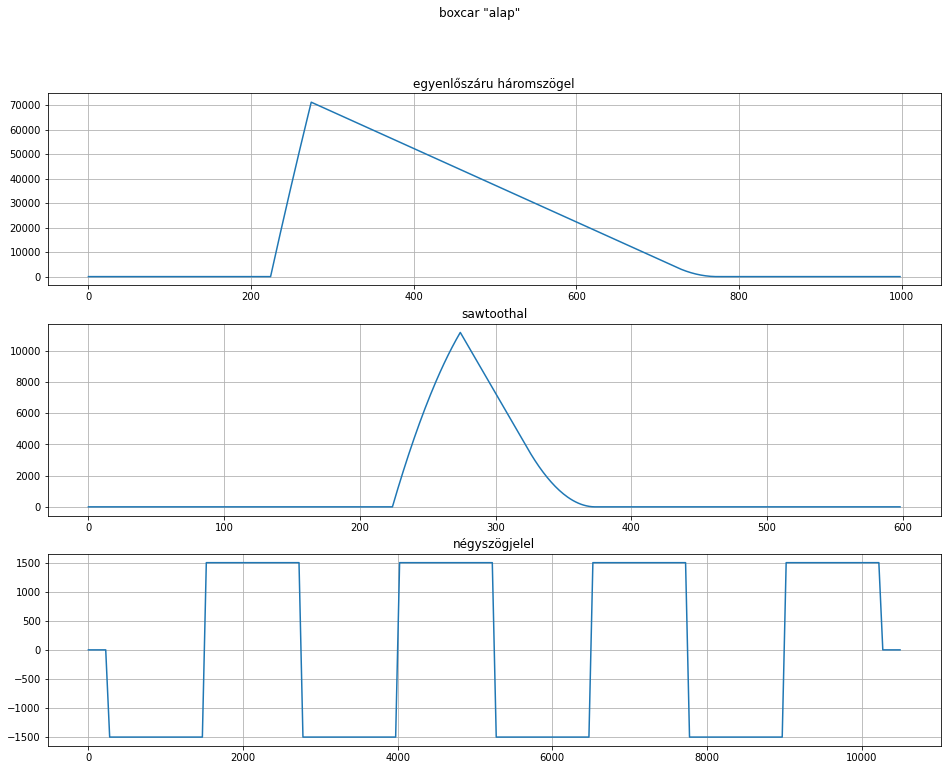

In [6]:
# c) rész
# keresztkorrelációk
fig, axs = plt.subplots(3,1,figsize=(16,12))
fig.suptitle('boxcar "alap"')


axs[0].plot(autocross(xb,x))
axs[0].set_title("egyenlőszáru háromszögel")
axs[0].grid()


axs[1].plot(autocross(xb,xs))
axs[1].set_title("sawtoothal")
axs[1].grid()




axs[2].plot(autocross(xb,plotnegy))
axs[2].set_title("négyszögjelel")
axs[2].grid()

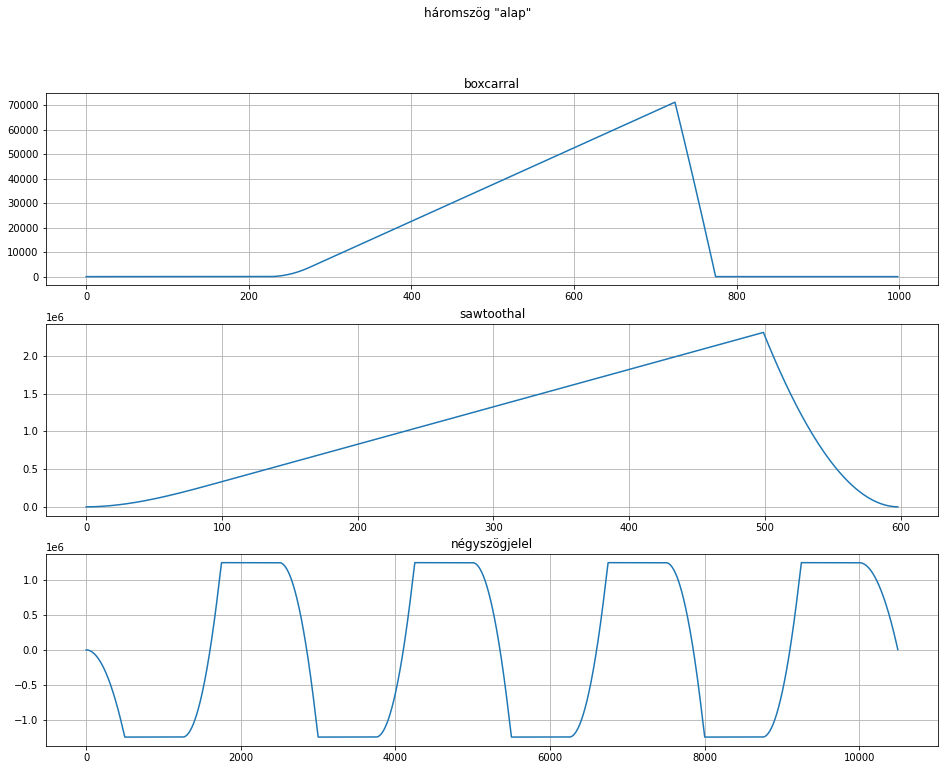

In [7]:

fig, axs = plt.subplots(3,1,figsize=(16,12))
fig.suptitle('háromszög "alap"')


axs[0].plot(autocross(x,xb))
axs[0].set_title("boxcarral")
axs[0].grid()


axs[1].plot(autocross(x,xs))
axs[1].set_title("sawtoothal")
axs[1].grid()




axs[2].plot(autocross(x,plotnegy))
axs[2].set_title("négyszögjelel")
axs[2].grid()

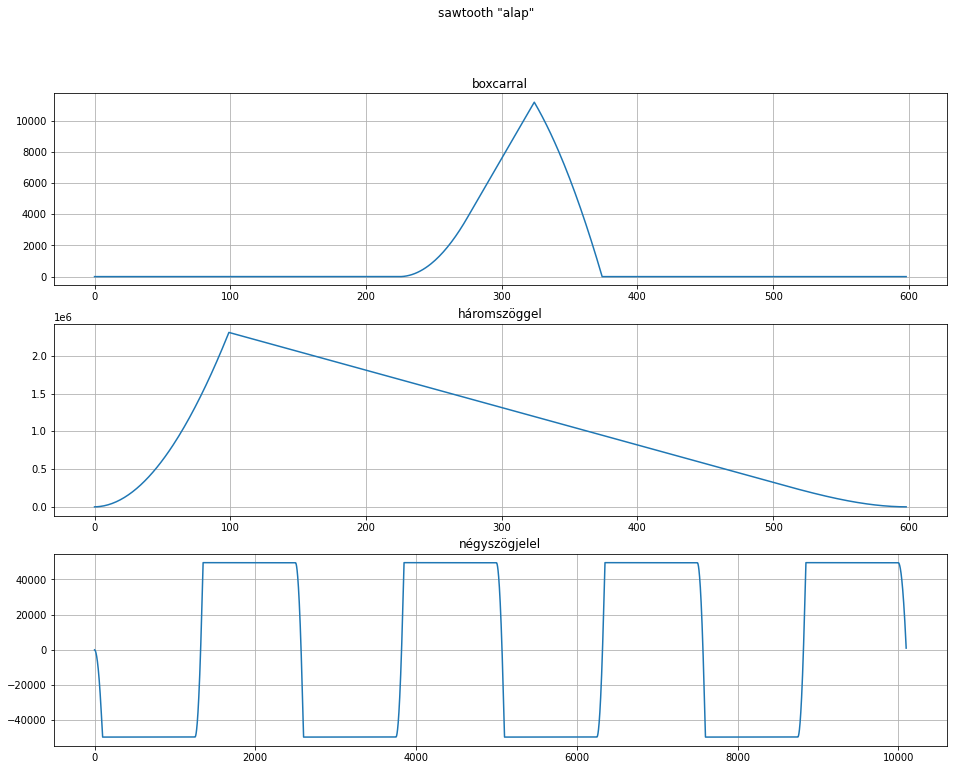

In [8]:

fig, axs = plt.subplots(3,1,figsize=(16,12))
fig.suptitle('sawtooth "alap"')


axs[0].plot(autocross(xs,xb))
axs[0].set_title("boxcarral")
axs[0].grid()


axs[1].plot(autocross(xs,x))
axs[1].set_title("háromszöggel")
axs[1].grid()




axs[2].plot(autocross(xs,plotnegy))
axs[2].set_title("négyszögjelel")
axs[2].grid()

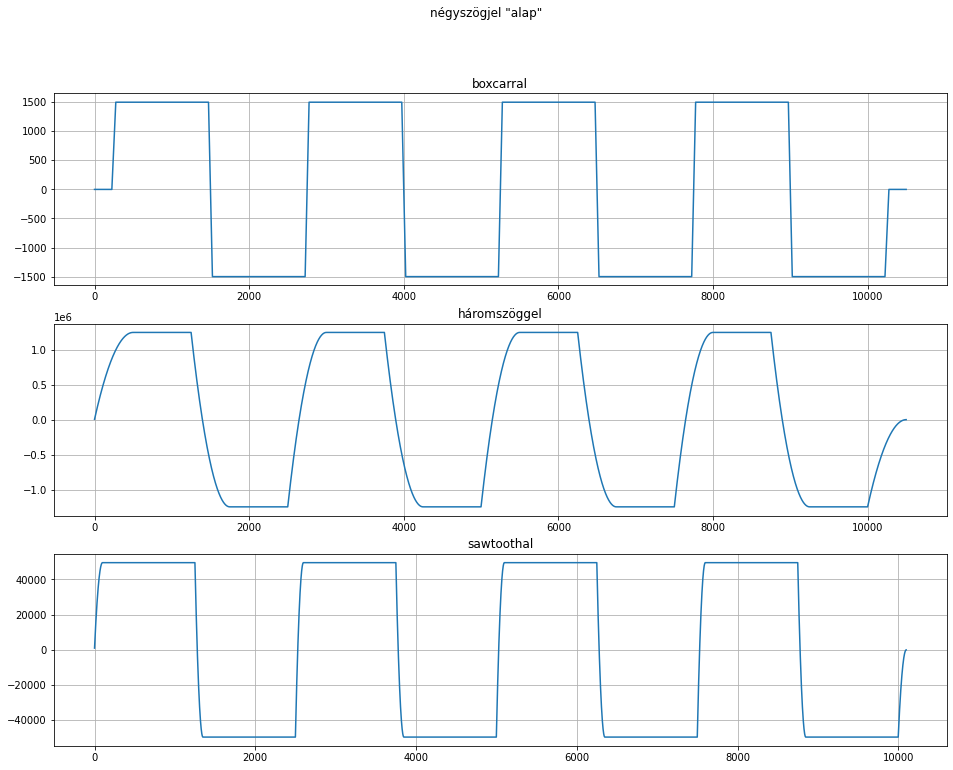

In [9]:

fig, axs = plt.subplots(3,1,figsize=(16,12))
fig.suptitle('négyszögjel "alap"')


axs[0].plot(autocross(plotnegy,xb))
axs[0].set_title("boxcarral")
axs[0].grid()


axs[1].plot(autocross(plotnegy,x))
axs[1].set_title("háromszöggel")
axs[1].grid()




axs[2].plot(autocross(plotnegy,xs))
axs[2].set_title("sawtoothal")
axs[2].grid()

In [10]:
# d) rész
# konvolúciók
def convolve(x, y):
    r = np.convolve(x, y, mode='full')
    return r

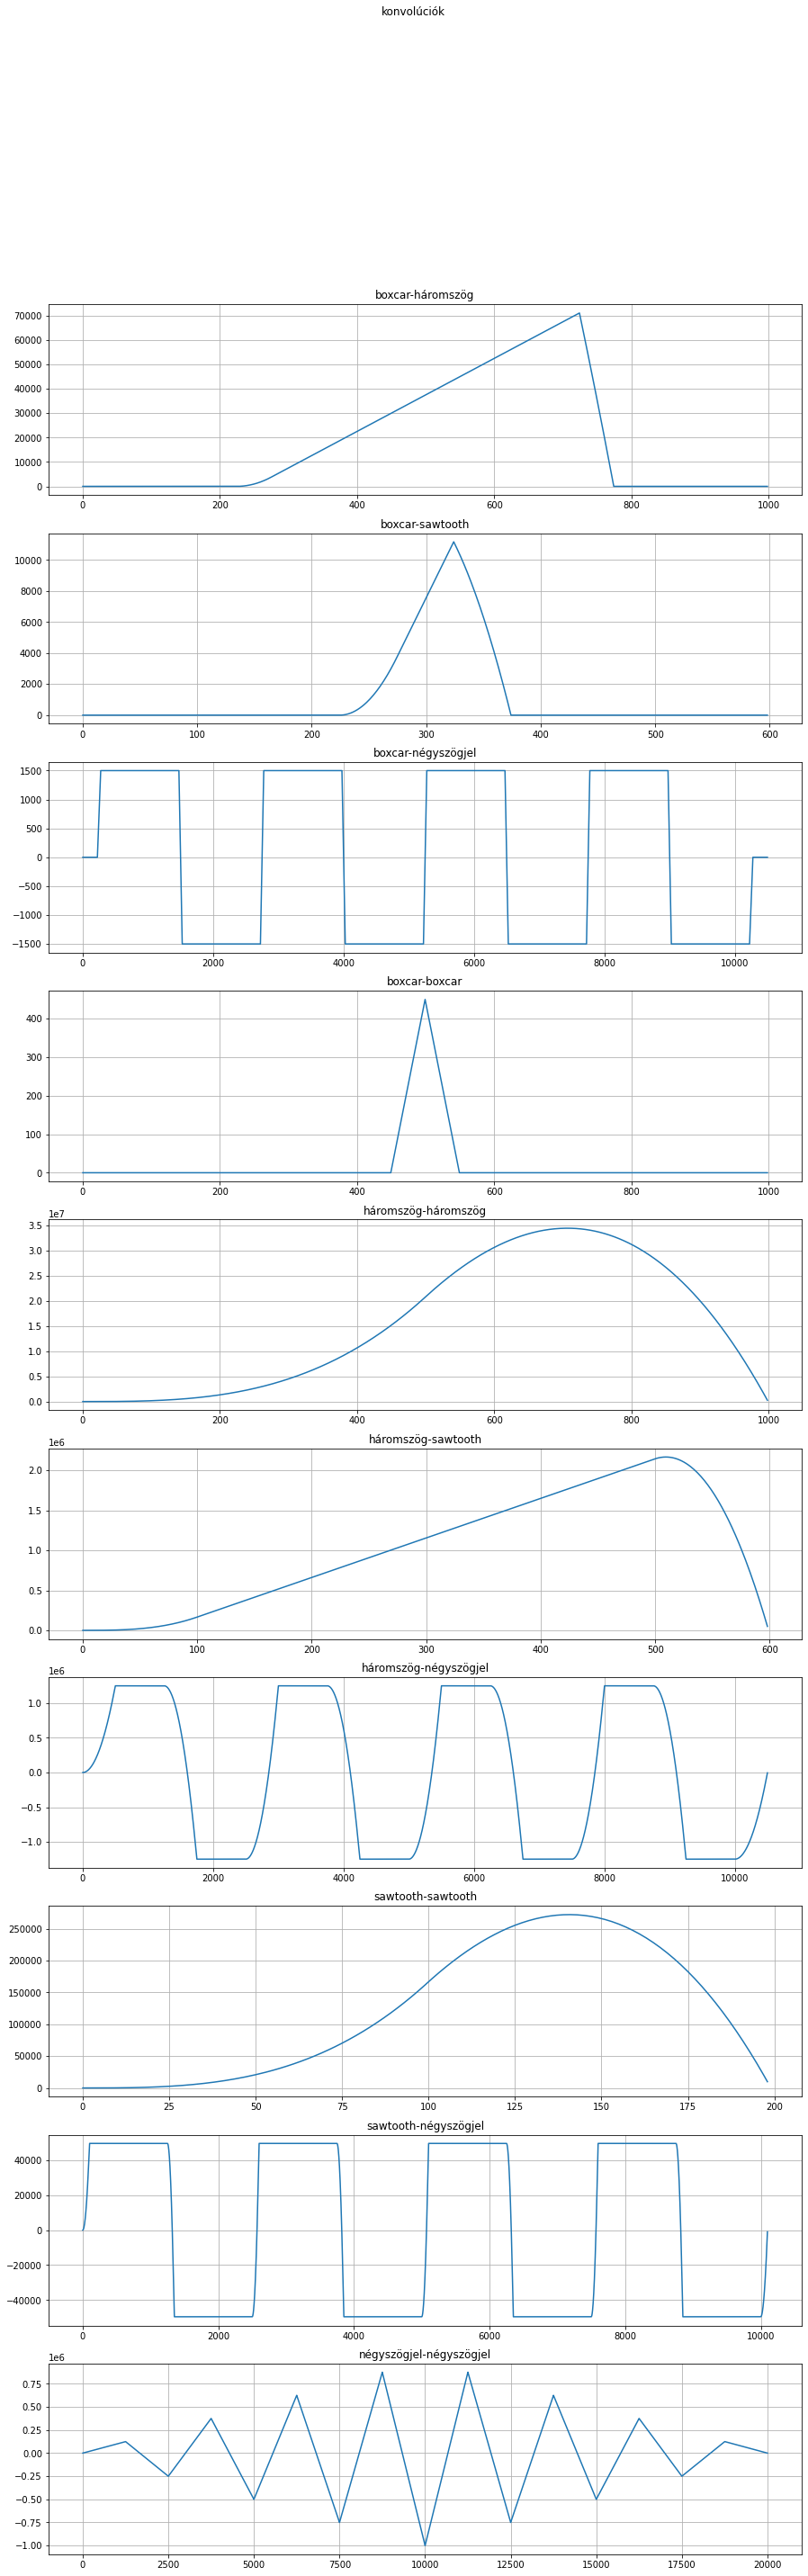

In [11]:

fig, axs = plt.subplots(10,1,figsize=(15,46))
fig.suptitle("konvolúciók")


axs[0].plot(convolve(xb,x))
axs[0].set_title("boxcar-háromszög")
axs[0].grid()


axs[1].plot(convolve(xb,xs))
axs[1].set_title("boxcar-sawtooth")
axs[1].grid()


axs[2].plot(convolve(xb,plotnegy))
axs[2].set_title("boxcar-négyszögjel")
axs[2].grid()
                 
axs[3].plot(convolve(xb,xb))
axs[3].set_title("boxcar-boxcar")
axs[3].grid()

axs[4].plot(convolve(x,x))
axs[4].set_title("háromszög-háromszög")
axs[4].grid()
                 
axs[5].plot(convolve(x,xs))
axs[5].set_title("háromszög-sawtooth")
axs[5].grid()
                 
axs[6].plot(convolve(x,plotnegy))
axs[6].set_title("háromszög-négyszögjel")
axs[6].grid()
                 
axs[7].plot(convolve(xs,xs))
axs[7].set_title("sawtooth-sawtooth")
axs[7].grid()
                 
axs[8].plot(convolve(xs,plotnegy))
axs[8].set_title("sawtooth-négyszögjel")
axs[8].grid()
                 
axs[9].plot(convolve(plotnegy,plotnegy))
axs[9].set_title("négyszögjel-négyszögjel")
axs[9].grid()

## Alap 2. feladatrész - Hold-radar kísérlet

Ebben és a következő feladatrészekben véletlenszerű folyamatokat fogunk vizsgálni és azt, hogy hogyan lehet ezek elemzésére felhasználni az előző feladatrészben tanultakat. 

Egy érdekes kísérlet, amiben véletlen folyamatnak, és a véletlen jelek statisztikus tulajdonságainak szerepe van, a Hold-radar kísérlet, melynek során a Holdról visszavert radarjeleket tudtak kimutatni.
(Ez néhány hét időkülönbséggel sikerült amerikai és magyar kutatóknak:
https://hu.wikipedia.org/wiki/Magyar_Hold-radar-kísérlet, https://en.wikipedia.org/wiki/Project_Diana)
A nehézség az volt, hogy a visszavert jel gyengesége miatt egyszerű módon nem tudták a vevők által fogott zajos jelből a visszevert jelet kiszűrni. A jelküldés sokszori ismétlésével és a felfogott jelek összegzésével azonban a jel felerősödött a zajhoz képest.

#### Feladat: 
Utánozzuk a Hold-radar kísérletet!
 Küldött jelként valamelyik impulzus jelünket válasszuk, azt egy $t_0$ időpontra eltolva!
Zajként vegyük a legegyszerűbb véletlen jelet, azaz egymás utáni időpillanatokban vett véletlen értékek sorozatát. Az értékek eloszlására a legtermészetesebb eloszlást, normál eloszlást válasszunk!
Felfogott jelként vegyük ezt a zajt, hozzáadva a kimenőjelet további késleltetéssel, és olyan kis amplitúdóval, hogy ábrázolásban ne legyen szemmel látható.

a) Mutassuk meg ábrán, hogy a felfogott jelen még nem látszik az impulzus. Másik ábrán mutassuk ki, hogy a "mérés" sokszori ismétlése és összegzése eredményeképpen az impulzus újra láthatóvá válik!

b) Próbáljuk ki azt is, hogy ha kiszámoljuk a kimenő jel és a felfogott jel korrelációs függvényét, az segít-e a jel jelenlétének kimutatásában! Tehát számoljuk ki és ábrázoljuk az összegzett felfogott jelnek a kimenő jellel vett korrelációs függvényét! Próbáljuk ki, mennyire lehet csökkenteni az ismétlések számát, esetleg el is lehet-e hagyni az ismétlést?

In [12]:
def triangle(A,T,t,k):
    times = np.arange(k, t)
    idok=t-k
    s=idok-(T+2)
    baloldal=np.linspace(0,A,int((T/2)+1))
    jobboldal=np.linspace(A,0,int((T/2)+1))
    zero=np.zeros(int(s))
    a=np.concatenate((baloldal,jobboldal))
    jel=np.concatenate((a,zero))
    return (times,jel)

In [19]:
# a) Utánozzuk a Hold-radar kísérletet!
k=0
t=k+50
impjel=triangle(2,40,t,k)
xjel=impjel[0]
yjel=impjel[1]
hold=autocross(xjel,xjel)

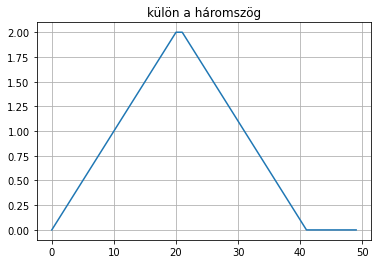

In [30]:
plt.plot(xjel,yjel)
plt.title("külön a háromszög")
plt.grid()

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

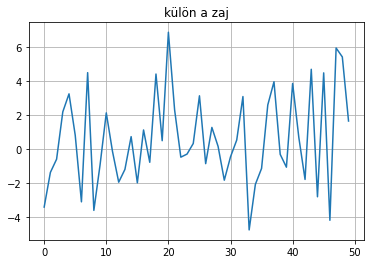

In [31]:
mu, sigma = 0, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, t)
plt.plot(s)
plt.title("külön a zaj")
plt.grid()

Text(0.5, 1.0, 'nem látszik a háromszögem')

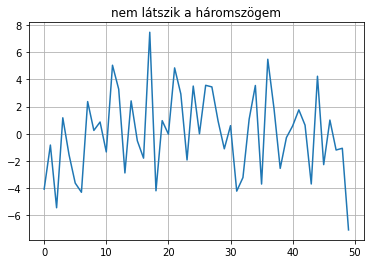

In [29]:
a=s+yjel
plt.plot(xjel,s)
plt.grid()
plt.title("nem látszik a háromszögem")

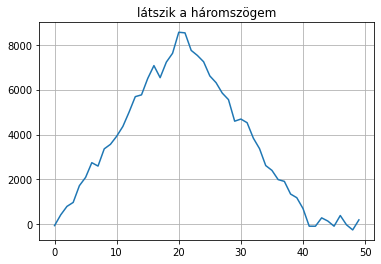

In [27]:
ism=2000
for i in range(ism):
    k=ism+3
    t2=k+50
    impjel=triangle(2,40,t2,k)
    xjel2=impjel[0]
    yjel2=impjel[1]
    s2 = np.random.normal(mu, sigma, len(yjel2))
    a+=s2
    a+=yjel2
plt.plot(xjel,a)
plt.title("látszik a háromszögem")
plt.grid()

Text(0.5, 1.0, 'szerintem 3 ismétlés után is kiválóan megfelelő')

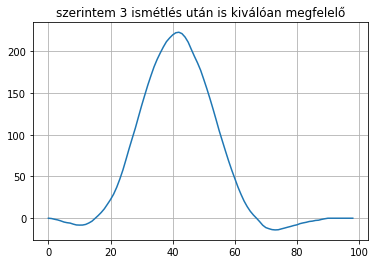

In [37]:
# b) korrelációs függvény használata
ism2=3
a3=0
for i in range(ism2):
    k=ism+3
    t2=k+50
    impjel=triangle(2,40,t2,k)
    xjel2=impjel[0]
    yjel2=impjel[1]
    s2 = np.random.normal(mu, sigma, len(yjel2))
    a3+=s2
    a3+=yjel2

plt.plot(convolve(yjel,a3))
plt.grid()
plt.title("szerintem 3 ismétlés után is kiválóan megfelelő")

## Teljes 3. feladatrész - Véletlen bolyongás

Bonyolultabb véletlen folyamatok egyik fajtája a véletlen bolyongás, melyben egy "részecske" valamilyen valószínűségi eloszlás szerint meghatározott lépések megtételével mozog egy, kettő vagy több dimenzióban.
A diszkrét időlépésekben történő bolyongást gyakran a [Brown-mozgás](https://en.wikipedia.org/wiki/Brownian_motion) egyszerű leírására használjuk.
Az egyszerű bolyongás esetén az időfejlődést leíró egyenlet
$$ x(t_{k+1}) = x(t_k) + \xi_k\;,\;\; \mbox{azaz}\;\;\;\; x(t_k) = \sum_{j=0}^{k-1} \xi_j\;, $$
ahol $\xi_k$ a véletlen változó.

Az időben folytonos véletlen folyamatokat ún. sztochasztikus differenciálegyenletekkel írjuk le.
Például a véletlen bolyongás határesete a Wiener-folyamat, melynek egyenlete
$$
\dot x = \xi(t)\;,
$$
ahol $\xi(t)$ a véletlenszerű fehér zajt reprezentálja.

#### Feladatok

a)
Írjunk egy `randomwalk` függvényt, amely megadott $N$-re szimulál egy $N$ lépéses egydimenziós véletlen bolyongást normál eloszlású véletlen lépésekkel! Ábrázoljuk a folyamat egy szakaszát úgy, hogy a bolyongás tipikus viselkedése jól megfigyelhető legyen.

b)
Mutassuk meg, hogy a bolyongás során a kiindulási ponttól való eltávolodásnak a várható értéke arányos a lépésszám négyzetgyökével!

In [ ]:
# a) randomwalk függvény, véletlen bolyongás

In [ ]:
# b) sqrt(t) függés ellenőrzése

## Teljes 4. feladatrész - Stacionárius véletlen folyamatok


A véletlen folyamatok közül fontosak a stacionáriusak, amelyeknél a felvett $x$ értékek hosszú időre meghatározott eloszlásfüggvénye invariáns az időeltolásra. Ez a tulajdonság az egyszerű bolyongásra és a Wiener-folyamatra nem teljesül, mivel a koordináta értékek eloszlása egyre szélesedik.
A Brown mozgást végző részecske sebességének valószínűségeloszlása azonban stacionárius, ha a sebesség minden határon túli növekedésének a közeg viszkozitása gátat szab.
Ezt folytonos időre írja le az ún. [Ornstein-Uhlenbeck-folyamat](https://en.wikipedia.org/wiki/Ornstein–Uhlenbeck_process), aminek differenciálegyenlete
$$ \dot v = - \gamma v + D\cdot\xi(t)\;,$$
ahol $\gamma$ és $D$ pozitív konstansok, melyek a csillapítás erősségét, illetve a folyamat diffúzivitását adják meg, $\xi(t)$ továbbra is fehér zaj.
Talán könyebben megérthető ennek időben diszkretizált változata:
$$ v(t_{k+1}) = (1-\alpha)\cdot v(t_k) + D\cdot\xi_k\;,\;\;\alpha=\gamma \Delta t\;,$$
amiben az első tag szemléletesen a sebesség csillapodását írja le  $\alpha\ll 1$ esetére. A második pedig az időlépés alatt a közeg részecskéivel történt ütközések eredő hatását adja meg (valójában az utóbbi függ a részecske sebességétől, de ez a hatás átlagolva az első tagba van beleértve). Vegyük észre, hogy a fenti képlet alapján sebesség időfejlődése két paramétertől függ: az $\alpha$-tól és $D$-től.
Érdemes megjegyezni, hogy a sebesség időfejlődése hasonlít a véletlen bolyongáshoz, és azzá is válik a $\gamma=0$ határesetben.

#### Feladatok

a) Írjunk egy  `brownian` függvényt, amely  az egydimenziós csillapított Brown-mozgás sebességét szimulálja és segítségével ábrázoljuk  azt az  idő függvényében!

b) Határozzuk meg a Brown-mozgás sebességének autokorrelációs függvényét $\alpha=0.01$ és $D=1$ értékekre és ábrázoljuk! Mivel ez egy  véletlen folyamat,  az autokorreláció értékei erősen véletlenszerűek. Végezzük el a szimulációt és számolást elegendően sokszor, és ellenőrizzük, hogy ha az eredményeket összeátlagoljuk egymással, az átlag valóban simább, mint az átlagolás nélküli korrelációs függvény! 

c) Hogyan függ a korrelációk lecsengése a mozgás paramétereitől? Vizsgáljuk meg egy, a fentebb használt $\alpha$ értéknél kisebb,  és egy nála nagyobb $\alpha$-ra ezt a kérdést! Ezután egy adott $\alpha$ érték mellett vegyünk még két  különböző $D$ értéket!  Foglaljuk össze röviden szavakban, hogy mit tapasztalunk!

d) Határozzuk meg  a Brown-mozgás sebességének teljesítményspektrumát! A b) részhez hasonlóan itt is mutassuk ki, 
hogy a többszöri lefuttatás során kapott teljesítményspektrumok átlaga simább, mint egy lefutásé!

e) Mutassuk meg  a csillapított Brown-mozgás esetére, hogy igaz a Wiener-Hincsin-tétel, azaz, hogy az autokorrelációs függvény Fourier-transzformáltjának abszolút értéke megegyezik a teljesítményspektrummal! Itt is próbáljuk ki az átlagolást!

In [ ]:
# a)  Brown-mozgás 

In [ ]:
# b) a Brown-mozgás sebességének autokorrelációs függvénye és átlaga

In [ ]:
# c) paraméterektől való függés

In [ ]:
# d) teljesítményspektrum és átlag 

In [ ]:
# e) a Wiener-Hincsin-tétel ellenőrzése

## <font color='green5'>5. Szorgalmi feladatrész: Kaotikus rendszer vizsgálata</font>

A kaotikus rendszerek  a véletlen folyamatok egy másik példáját mutatjál. Ebben az esetben a rendszert leíró  egyenlet teljesen determinisztikus, hosszú távon mégis véletlenszerű viselkedést tapasztalhatunk.

A logisztikus leképezés az egyik legegyszerűbb kaotikus viselkedést mutató rendszer, melyet a következő iteratív formula definiál (az érdeklődőbbek olvashatnak [róla itt](https://en.wikipedia.org/wiki/Logistic_map)):

$$
x_{t + 1} = r \, x_t \left( 1 - x_t \right)
$$

Az $r$ érték egy ún. kontrollparaméter, amelytől függ, hogy a rendszer milyen viselkedést mutat, pl. hosszú távon periodikussá válik, vagy kaotikus viselkedést mutat. A kaotikus viselkedés $r_c \approx 3.56995$ és a maximális $r_{max}=4$ érték között figyelhető meg. Ezt a kaotikus viselkedést megszakítják olyan intervallumok, u.n. periódikus ablakok, ahol periódikus viselkedés figyelhető meg, amint a kinagyított [bifurkációs diagramon](https://en.wikipedia.org/wiki/Logistic_map#/media/File:Subsection_Bifurcation_Diagram_Logistic_Map.png)
jól látszik. A bifurkációs diagram a paraméter függvényében mutatja, hogy az egyes paraméterértékeknél a rendszer hosszútávú viselkedése során milyen $x$ értékeket jár be.
E rendszer az $r_{max}$ értéknél a legerősebben kaotikus.

A kaotikus rendszerek egy részének érdekes jellemzője, hogy bizonyos kontrollparaméter mellett ún. [intermittens](https://en.wikipedia.org/wiki/Intermittency) viselkedést mutatnak. Ilyenkor a rendszer váratlanul hosszabb vagy rövidebb ideig közel periodikus viselkedést mutat, majd idővel újra beáll a káosz, és ez a kettő váltakozik.
Ilyen a logisztikus leképezésben a periódikus ablakoktól kevéssel balra figyelhető meg, pl. $r=3.828$ értéknél, de $r$ értékét tovább csökkentve $r=3.8$-nál már ez a jelenség lényegében eltűnt.

Feladatok:

a) Írjunk függvényt, mely megvalósítja a fent definiált logisztikus leképezést.
Ábrázoljuk a folyamatot az $r$ kontrollparaméter néhány különböző értéke mellett.
Válasszuk ehhez a fent említett erősen kaotikus és intermittens esetet, és keressünk egy-egy hozzájuk hasonlót!

b) Bővítsük az előbbi vizsgálatokat az autokovariancia függvény meghatározásával, és ábrázoljuk, hogyan cseng le a korreláció ezekben az esetekben!

In [ ]:
# a)
# A logisztikus leképezést megvalósító függvény

# a,b)
# A logisztikus leképezés tulajdonságainak vizsgálata